In [1]:
import numpy as np
import matplotlib.pyplot as plt

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars


0.795
[[18.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 16.  0.  0.  1.  1.  0.  1.  1.]
 [ 0.  0.  0. 17.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 12.  0.  3.  0.  1.  4.]
 [ 0.  0.  0.  0.  2. 14.  0.  0.  3.  1.]
 [ 0.  0.  0.  0.  0.  0. 19.  0.  1.  0.]
 [ 0.  0.  0.  0.  3.  0.  0. 12.  0.  5.]
 [ 1.  0.  0.  0.  0.  0.  0.  0. 18.  1.]
 [ 1.  0.  0.  1.  3.  0.  0.  1.  1. 13.]]


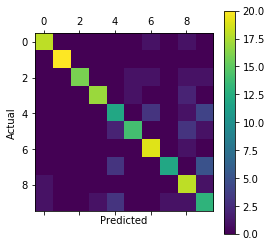

In [5]:
def calculatemean():
    mean_matrix = np.zeros((10, 784))
    number = 1
    for images in range (0,10):  
        for num in range (0,240):   
            img = plt.imread("Train/"+str(number)+".jpg").ravel()
            number+=1
            for pixels in range (0,784):              
                mean_matrix[images][pixels]+=(img[pixels]/255)
    mean_matrix = mean_matrix/240 
    return mean_matrix
def calculateVariance(mean_matrix):
    var_matrix = np.zeros((10, 784))
    number = 1
    for images in range (0,10):  
        for num in range (0,240):   
            img = plt.imread("Train/"+str(number)+".jpg").ravel()
            number+=1
            for pixels in range (0,784):              
                var_matrix[images][pixels]+=(((img[pixels]/255)-mean_matrix[images][pixels])*((img[pixels]/255)-mean_matrix[images][pixels]))
    var_matrix = var_matrix/240
    for i in range (0,10): 
        for j in range (0,784):
            if (var_matrix[i][j]<0.01):
                var_matrix[i][j]=0.01
    return var_matrix 
#testing phase
acc=0
test = open("Test/Test Labels.txt", "r")
confusion_matrix = np.zeros((10,10))
greatest_probability = np.zeros((200,10)) #an array which will hold the gaussian values for each group for each image
mean = calculatemean() #calculate mean
var  = calculateVariance(mean) #calculate variance
for image in range (0,200):
    number = image+1
    img = plt.imread("Test/"+str(number)+".jpg").ravel()       
    for group in range (0,10): #we have 10 groups that the image can belong to
        gaussian=1
        for pixel in range(0,784):                     
            exp_numerator = (((img[pixel]/255)-mean[group][pixel])*((img[pixel]/255)-mean[group][pixel]))
            exp_expression = (-((exp_numerator)/(2*var[group][pixel])))
            x = (1/(np.sqrt(2*np.pi*var[group][pixel])))*(np.exp(exp_expression))
            gaussian = x*gaussian
        greatest_probability[image][group]=gaussian
    maximum = np.argmax( greatest_probability[image])
    actual= int (test.readline())
    if(actual==maximum):
        acc+=1
    confusion_matrix[actual][maximum]=confusion_matrix[actual][maximum]+1
print(acc/200)
print (confusion_matrix)
plt.matshow(confusion_matrix,fignum=None)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.savefig('Confusion.jpg')  